In [1]:
import math
import random
import numpy as np

In [2]:
# sta_amount: Total contend stations number
# RA_RU: RA_RU number reserved for UORA
# Lmax: Retransmit limit
# TXOP: Transaction Opportunity (time length in ms)
# ocw_min: minimum OCW
# ocw_max: maximum OCW
# CR: Capture Ratio (CR=infinite = no capture, CR=0 = always capture)

def simulation_1(sta_amount, RA_RU, Lmax, TXOP, ocw_min, ocw_max, CR, step):
    total_power = 0
    counter_delay_slot=0
    success_sta=0
    # setting ocw for each transmission [ocw_min, 1st_retry_ocw...ocw_max]
    ocw = [0 for _ in range(0, Lmax)]
    ocw[0] = ocw_min
    for n in range (1, Lmax):
        temp_ocw = ocw[n-1] * 2 + 1
        if temp_ocw <= ocw_max:
            ocw[n] = temp_ocw
        else:
            ocw[n] = ocw[n-1]
    # Imax: Reserved slot for transmission (total slots in worst case)
    Imax = 0
    for n in range(0, Lmax):
        Imax += math.ceil(ocw[n] / RA_RU)

    # ------------------------------------ STA setting ------------------------------------------
    # set each STA's OBO counter, obo_counter[STA1_obo_counter, STA2_obo_counter...]
    obo_counter = [random.randint(0, ocw_min) for _ in range(0, sta_amount)]
    # set STA's transmit attempt time, retrans_counter[STA1_obo_counter, STA2_obo_counter...]
    retrans_counter = [0 for _ in range(0, sta_amount)]
    # STA's distance from AP (From 0~1)
    sta_distance = [random.uniform(0, 1) for _ in range(0, sta_amount)]
    # record STAs choosen RA-RU, sta_on_R[slot_number][STA_1, STA_26...]
    sta_on_R = [[[] for _ in range(0,RA_RU)] for _ in range(0,Imax)]
    # Accumulated station transmit power usage
    sta_power_usage = [0 for _ in range(0, sta_amount)]
    
    capture_power_ratio = 10 ** (CR / 10)
    
    # No.i slot    
    for i in range(0, Imax):
        # STA's Transmit power [1P, 2P, 4P, 8P]
#         sta_power = [2 ** random.randint(0, 3) for _ in range(0, sta_amount)]
        sta_power = [2 ** (x if x <= (step - 1) else (step - 1)) for x in retrans_counter]

        # No.x STA
        for x in range (0,sta_amount):
            # decrease OBO counter by RA-RU number
            obo_counter[x] -= RA_RU
            # if counter <=0 select R
            if (obo_counter[x] <= 0 and retrans_counter[x] < Lmax):
                selected_R_index = random.randint(0, RA_RU-1)
                sta_on_R[i][selected_R_index].append(x)
                
                # record power usage
                sta_power_usage[x] += sta_power[x]
#                 sta_power_usage[x] += (2 ** retrans_counter[x])
        # check the balls in R
        for r in range(0, len(sta_on_R[i])):
            # Record power (no power control so always 1)
            for sta_index in sta_on_R[i][r]:
                total_power += sta_power[sta_index]
            # success STA
            if (len(sta_on_R[i][r]) == 1):
                success_sta_index = sta_on_R[i][r][0]
                # mark 99999 = won't trasnmit again
                obo_counter[success_sta_index] = 99999
                # record access delay slot number
                counter_delay_slot += (i+1)
                success_sta += 1
            else:
                for fail_idx in sta_on_R[i][r]:
                    retrans_counter[fail_idx] += 1
                    if (retrans_counter[fail_idx] < Lmax):
                        obo_counter[fail_idx] = random.randint(0, ocw[retrans_counter[fail_idx]])
    success_probability = success_sta / sta_amount
    access_delay = 0
    if success_sta > 0:
        access_delay = (TXOP * counter_delay_slot) / success_sta
    
    through_put = success_sta / Imax
    utilization = success_sta / (Imax * RA_RU)
    
    average_power = 0
    if success_sta > 0:
        average_power = total_power / success_sta
#     average_power = total_power / sta_amount
    
    return success_probability, access_delay, through_put, utilization, average_power, success_sta

In [3]:
# sta_amount: Total contend stations number
# RA_RU: RA_RU number reserved for UORA
# Lmax: Retransmit limit
# TXOP: Transaction Opportunity (time length in ms)
# ocw_min: minimum OCW
# ocw_max: maximum OCW
# CR: Capture Ratio (CR=infinite = no capture, CR=0 = always capture)

def simulation_2(sta_amount, RA_RU, Lmax, TXOP, ocw_min, ocw_max, CR, step):
    total_power = 0
    counter_delay_slot=0
    success_sta=0
    # setting ocw for each transmission [ocw_min, 1st_retry_ocw...ocw_max]
    ocw = [0 for _ in range(0, Lmax)]
    ocw[0] = ocw_min
    for n in range (1, Lmax):
        temp_ocw = ocw[n-1] * 2 + 1
        if temp_ocw <= ocw_max:
            ocw[n] = temp_ocw
        else:
            ocw[n] = ocw[n-1]
    # Imax: Reserved slot for transmission (total slots in worst case)
    Imax = 0
    for n in range(0, Lmax):
        Imax += math.ceil(ocw[n] / RA_RU)

    # ------------------------------------ STA setting ------------------------------------------
    # set each STA's OBO counter, obo_counter[STA1_obo_counter, STA2_obo_counter...]
    obo_counter = [random.randint(0, ocw_min) for _ in range(0, sta_amount)]
    # set STA's transmit attempt time, retrans_counter[STA1_obo_counter, STA2_obo_counter...]
    retrans_counter = [0 for _ in range(0, sta_amount)]
    # STA's distance from AP (From 0~1)
    sta_distance = [random.uniform(0, 1) for _ in range(0, sta_amount)]
    # record STAs choosen RA-RU, sta_on_R[slot_number][STA_1, STA_26...]
    sta_on_R = [[[] for _ in range(0,RA_RU)] for _ in range(0,Imax)]
    # Accumulated station transmit power usage
    sta_power_usage = [0 for _ in range(0, sta_amount)]
    
    capture_power_ratio = 10 ** (CR / 10)
    
    # No.i slot    
    for i in range(0, Imax):
        # STA's Transmit power [1P, 2P, 4P, 8P]
#         sta_power = [2 ** random.randint(0, 3) for _ in range(0, sta_amount)]
        sta_power = [2 ** (x if x <= (step - 1) else (step - 1)) for x in retrans_counter]

        # No.x STA
        for x in range (0,sta_amount):
            # decrease OBO counter by RA-RU number
            obo_counter[x] -= RA_RU
            # if counter <=0 select R
            if (obo_counter[x] <= 0 and retrans_counter[x] < Lmax):
                selected_R_index = random.randint(0, RA_RU-1)
                sta_on_R[i][selected_R_index].append(x)
                
                # record power usage
                sta_power_usage[x] += sta_power[x]
#                 sta_power_usage[x] += (2 ** retrans_counter[x])
        # check the balls in R
        for r in range(0, len(sta_on_R[i])):
            # Record power (no power control so always 1)
            for sta_index in sta_on_R[i][r]:
                total_power += sta_power[sta_index]
            # success STA
            if (len(sta_on_R[i][r]) == 1):
                success_sta_index = sta_on_R[i][r][0]
                # mark 99999 = won't trasnmit again
                obo_counter[success_sta_index] = 99999
                # record access delay slot number
                counter_delay_slot += (i+1)
                success_sta += 1
#                 total_power += sta_power_usage[success_sta_index]
            # 2 STA on the same R -> capture process
            elif (len(sta_on_R[i][r]) == 2):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                
                if (receive_power_1 / receive_power_2) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs 2
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                elif (receive_power_1 / receive_power_2) < (1 / capture_power_ratio):
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_2]
                    
                    # fail STA 1
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                else:
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                
            else:
                for fail_idx in sta_on_R[i][r]:
                    retrans_counter[fail_idx] += 1
                    if (retrans_counter[fail_idx] < Lmax):
                        obo_counter[fail_idx] = random.randint(0, ocw[retrans_counter[fail_idx]])
    success_probability = success_sta / sta_amount
    access_delay = 0
    if success_sta > 0:
        access_delay = (TXOP * counter_delay_slot) / success_sta
    
    through_put = success_sta / Imax
    utilization = success_sta / (Imax * RA_RU)
    
    average_power = 0
    if success_sta > 0:
        average_power = total_power / success_sta
#     average_power = total_power / sta_amount
    
    return success_probability, access_delay, through_put, utilization, average_power, success_sta

In [4]:
# sta_amount: Total contend stations number
# RA_RU: RA_RU number reserved for UORA
# Lmax: Retransmit limit
# TXOP: Transaction Opportunity (time length in ms)
# ocw_min: minimum OCW
# ocw_max: maximum OCW
# CR: Capture Ratio (CR=infinite = no capture, CR=0 = always capture)

def simulation_3(sta_amount, RA_RU, Lmax, TXOP, ocw_min, ocw_max, CR, step):
    total_power = 0
    counter_delay_slot=0
    success_sta=0
    # setting ocw for each transmission [ocw_min, 1st_retry_ocw...ocw_max]
    ocw = [0 for _ in range(0, Lmax)]
    ocw[0] = ocw_min
    for n in range (1, Lmax):
        temp_ocw = ocw[n-1] * 2 + 1
        if temp_ocw <= ocw_max:
            ocw[n] = temp_ocw
        else:
            ocw[n] = ocw[n-1]
    # Imax: Reserved slot for transmission (total slots in worst case)
    Imax = 0
    for n in range(0, Lmax):
        Imax += math.ceil(ocw[n] / RA_RU)

    # ------------------------------------ STA setting ------------------------------------------
    # set each STA's OBO counter, obo_counter[STA1_obo_counter, STA2_obo_counter...]
    obo_counter = [random.randint(0, ocw_min) for _ in range(0, sta_amount)]
    # set STA's transmit attempt time, retrans_counter[STA1_obo_counter, STA2_obo_counter...]
    retrans_counter = [0 for _ in range(0, sta_amount)]
    # STA's distance from AP (From 0~1)
    sta_distance = [random.uniform(0, 1) for _ in range(0, sta_amount)]
    # record STAs choosen RA-RU, sta_on_R[slot_number][STA_1, STA_26...]
    sta_on_R = [[[] for _ in range(0,RA_RU)] for _ in range(0,Imax)]
    # Accumulated station transmit power usage
    sta_power_usage = [0 for _ in range(0, sta_amount)]
    
    capture_power_ratio = 10 ** (CR / 10)
    
    # No.i slot    
    for i in range(0, Imax):
        # STA's Transmit power [1P, 2P, 4P, 8P]
#         sta_power = [2 ** random.randint(0, 3) for _ in range(0, sta_amount)]
        sta_power = [2 ** (x if x <= (step - 1) else (step - 1)) for x in retrans_counter]

        # No.x STA
        for x in range (0,sta_amount):
            # decrease OBO counter by RA-RU number
            obo_counter[x] -= RA_RU
            # if counter <=0 select R
            if (obo_counter[x] <= 0 and retrans_counter[x] < Lmax):
                selected_R_index = random.randint(0, RA_RU-1)
                sta_on_R[i][selected_R_index].append(x)
                
                # record power usage
                sta_power_usage[x] += sta_power[x]
#                 sta_power_usage[x] += (2 ** retrans_counter[x])
        # check the balls in R
        for r in range(0, len(sta_on_R[i])):
            # Record power (no power control so always 1)
            for sta_index in sta_on_R[i][r]:
                total_power += sta_power[sta_index]
            # success STA
            if (len(sta_on_R[i][r]) == 1):
                success_sta_index = sta_on_R[i][r][0]
                # mark 99999 = won't trasnmit again
                obo_counter[success_sta_index] = 99999
                # record access delay slot number
                counter_delay_slot += (i+1)
                success_sta += 1
#                 total_power += sta_power_usage[success_sta_index]
            # 2 STA on the same R -> capture process
            elif (len(sta_on_R[i][r]) == 2):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                
                if (receive_power_1 / receive_power_2) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs 2
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                elif (receive_power_1 / receive_power_2) < (1 / capture_power_ratio):
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_2]
                    
                    # fail STA 1
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                else:
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])

            elif (len(sta_on_R[i][r]) == 3):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                
                if (receive_power_1 / (receive_power_2 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_2 / (receive_power_1 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_3 / (receive_power_1 + receive_power_2)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
            else:
                for fail_idx in sta_on_R[i][r]:
                    retrans_counter[fail_idx] += 1
                    if (retrans_counter[fail_idx] < Lmax):
                        obo_counter[fail_idx] = random.randint(0, ocw[retrans_counter[fail_idx]])
    success_probability = success_sta / sta_amount
    access_delay = 0
    if success_sta > 0:
        access_delay = (TXOP * counter_delay_slot) / success_sta
    
    through_put = success_sta / Imax
    utilization = success_sta / (Imax * RA_RU)
    
    average_power = 0
    if success_sta > 0:
        average_power = total_power / success_sta
#     average_power = total_power / sta_amount
    
    return success_probability, access_delay, through_put, utilization, average_power, success_sta

In [5]:
# sta_amount: Total contend stations number
# RA_RU: RA_RU number reserved for UORA
# Lmax: Retransmit limit
# TXOP: Transaction Opportunity (time length in ms)
# ocw_min: minimum OCW
# ocw_max: maximum OCW
# CR: Capture Ratio (CR=infinite = no capture, CR=0 = always capture)

def simulation_4(sta_amount, RA_RU, Lmax, TXOP, ocw_min, ocw_max, CR, step):
    total_power = 0
    counter_delay_slot=0
    success_sta=0
    # setting ocw for each transmission [ocw_min, 1st_retry_ocw...ocw_max]
    ocw = [0 for _ in range(0, Lmax)]
    ocw[0] = ocw_min
    for n in range (1, Lmax):
        temp_ocw = ocw[n-1] * 2 + 1
        if temp_ocw <= ocw_max:
            ocw[n] = temp_ocw
        else:
            ocw[n] = ocw[n-1]
    # Imax: Reserved slot for transmission (total slots in worst case)
    Imax = 0
    for n in range(0, Lmax):
        Imax += math.ceil(ocw[n] / RA_RU)

    # ------------------------------------ STA setting ------------------------------------------
    # set each STA's OBO counter, obo_counter[STA1_obo_counter, STA2_obo_counter...]
    obo_counter = [random.randint(0, ocw_min) for _ in range(0, sta_amount)]
    # set STA's transmit attempt time, retrans_counter[STA1_obo_counter, STA2_obo_counter...]
    retrans_counter = [0 for _ in range(0, sta_amount)]
    # STA's distance from AP (From 0~1)
    sta_distance = [random.uniform(0, 1) for _ in range(0, sta_amount)]
    # record STAs choosen RA-RU, sta_on_R[slot_number][STA_1, STA_26...]
    sta_on_R = [[[] for _ in range(0,RA_RU)] for _ in range(0,Imax)]
    # Accumulated station transmit power usage
    sta_power_usage = [0 for _ in range(0, sta_amount)]
    
    capture_power_ratio = 10 ** (CR / 10)
    
    # No.i slot    
    for i in range(0, Imax):
        # STA's Transmit power [1P, 2P, 4P, 8P]
#         sta_power = [2 ** random.randint(0, 3) for _ in range(0, sta_amount)]
        sta_power = [2 ** (x if x <= (step - 1) else (step - 1)) for x in retrans_counter]

        # No.x STA
        for x in range (0,sta_amount):
            # decrease OBO counter by RA-RU number
            obo_counter[x] -= RA_RU
            # if counter <=0 select R
            if (obo_counter[x] <= 0 and retrans_counter[x] < Lmax):
                selected_R_index = random.randint(0, RA_RU-1)
                sta_on_R[i][selected_R_index].append(x)
                
                # record power usage
                sta_power_usage[x] += sta_power[x]
#                 sta_power_usage[x] += (2 ** retrans_counter[x])
        # check the balls in R
        for r in range(0, len(sta_on_R[i])):
            # Record power (no power control so always 1)
            for sta_index in sta_on_R[i][r]:
                total_power += sta_power[sta_index]
            # success STA
            if (len(sta_on_R[i][r]) == 1):
                success_sta_index = sta_on_R[i][r][0]
                # mark 99999 = won't trasnmit again
                obo_counter[success_sta_index] = 99999
                # record access delay slot number
                counter_delay_slot += (i+1)
                success_sta += 1
#                 total_power += sta_power_usage[success_sta_index]
            # 2 STA on the same R -> capture process
            elif (len(sta_on_R[i][r]) == 2):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                
                if (receive_power_1 / receive_power_2) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs 2
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                elif (receive_power_1 / receive_power_2) < (1 / capture_power_ratio):
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_2]
                    
                    # fail STA 1
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                else:
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])

            elif (len(sta_on_R[i][r]) == 3):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                
                if (receive_power_1 / (receive_power_2 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_2 / (receive_power_1 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_3 / (receive_power_1 + receive_power_2)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
            elif (len(sta_on_R[i][r]) == 4):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                success_sta_index_4 = sta_on_R[i][r][3]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                receive_power_4 = sta_power[success_sta_index_4] / (sta_distance[success_sta_index_4] ** 2)
                
                if (receive_power_1 / (receive_power_2 + receive_power_3 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_2 / (receive_power_1 + receive_power_3 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_3 / (receive_power_1 + receive_power_2 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_4 / (receive_power_1 + receive_power_2 + receive_power_3)) > capture_power_ratio:
                    obo_counter[success_sta_index_4] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
            else:
                for fail_idx in sta_on_R[i][r]:
                    retrans_counter[fail_idx] += 1
                    if (retrans_counter[fail_idx] < Lmax):
                        obo_counter[fail_idx] = random.randint(0, ocw[retrans_counter[fail_idx]])
    success_probability = success_sta / sta_amount
    access_delay = 0
    if success_sta > 0:
        access_delay = (TXOP * counter_delay_slot) / success_sta
    
    through_put = success_sta / Imax
    utilization = success_sta / (Imax * RA_RU)
    
    average_power = 0
    if success_sta > 0:
        average_power = total_power / success_sta
#     average_power = total_power / sta_amount
    
    return success_probability, access_delay, through_put, utilization, average_power, success_sta

In [6]:
# sta_amount: Total contend stations number
# RA_RU: RA_RU number reserved for UORA
# Lmax: Retransmit limit
# TXOP: Transaction Opportunity (time length in ms)
# ocw_min: minimum OCW
# ocw_max: maximum OCW
# CR: Capture Ratio (CR=infinite = no capture, CR=0 = always capture)

def simulation_5(sta_amount, RA_RU, Lmax, TXOP, ocw_min, ocw_max, CR, step):
    total_power = 0
    counter_delay_slot=0
    success_sta=0
    # setting ocw for each transmission [ocw_min, 1st_retry_ocw...ocw_max]
    ocw = [0 for _ in range(0, Lmax)]
    ocw[0] = ocw_min
    for n in range (1, Lmax):
        temp_ocw = ocw[n-1] * 2 + 1
        if temp_ocw <= ocw_max:
            ocw[n] = temp_ocw
        else:
            ocw[n] = ocw[n-1]
    # Imax: Reserved slot for transmission (total slots in worst case)
    Imax = 0
    for n in range(0, Lmax):
        Imax += math.ceil(ocw[n] / RA_RU)

    # ------------------------------------ STA setting ------------------------------------------
    # set each STA's OBO counter, obo_counter[STA1_obo_counter, STA2_obo_counter...]
    obo_counter = [random.randint(0, ocw_min) for _ in range(0, sta_amount)]
    # set STA's transmit attempt time, retrans_counter[STA1_obo_counter, STA2_obo_counter...]
    retrans_counter = [0 for _ in range(0, sta_amount)]
    # STA's distance from AP (From 0~1)
    sta_distance = [random.uniform(0, 1) for _ in range(0, sta_amount)]
    # record STAs choosen RA-RU, sta_on_R[slot_number][STA_1, STA_26...]
    sta_on_R = [[[] for _ in range(0,RA_RU)] for _ in range(0,Imax)]
    # Accumulated station transmit power usage
    sta_power_usage = [0 for _ in range(0, sta_amount)]
    
    capture_power_ratio = 10 ** (CR / 10)
    
    # No.i slot    
    for i in range(0, Imax):
        # STA's Transmit power [1P, 2P, 4P, 8P]
#         sta_power = [2 ** random.randint(0, 3) for _ in range(0, sta_amount)]
        sta_power = [2 ** (x if x <= (step - 1) else (step - 1)) for x in retrans_counter]

        # No.x STA
        for x in range (0,sta_amount):
            # decrease OBO counter by RA-RU number
            obo_counter[x] -= RA_RU
            # if counter <=0 select R
            if (obo_counter[x] <= 0 and retrans_counter[x] < Lmax):
                selected_R_index = random.randint(0, RA_RU-1)
                sta_on_R[i][selected_R_index].append(x)
                
                # record power usage
                sta_power_usage[x] += sta_power[x]
#                 sta_power_usage[x] += (2 ** retrans_counter[x])
        # check the balls in R
        for r in range(0, len(sta_on_R[i])):
            # Record power (no power control so always 1)
            for sta_index in sta_on_R[i][r]:
                total_power += sta_power[sta_index]
            # success STA
            if (len(sta_on_R[i][r]) == 1):
                success_sta_index = sta_on_R[i][r][0]
                # mark 99999 = won't trasnmit again
                obo_counter[success_sta_index] = 99999
                # record access delay slot number
                counter_delay_slot += (i+1)
                success_sta += 1
#                 total_power += sta_power_usage[success_sta_index]
            # 2 STA on the same R -> capture process
            elif (len(sta_on_R[i][r]) == 2):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                
                if (receive_power_1 / receive_power_2) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs 2
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                elif (receive_power_1 / receive_power_2) < (1 / capture_power_ratio):
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_2]
                    
                    # fail STA 1
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                else:
                    retrans_counter[success_sta_index_1] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])

            elif (len(sta_on_R[i][r]) == 3):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                
                if (receive_power_1 / (receive_power_2 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_2 / (receive_power_1 + receive_power_3)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                if (receive_power_3 / (receive_power_1 + receive_power_2)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
            elif (len(sta_on_R[i][r]) == 4):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                success_sta_index_4 = sta_on_R[i][r][3]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                receive_power_4 = sta_power[success_sta_index_4] / (sta_distance[success_sta_index_4] ** 2)
                
                if (receive_power_1 / (receive_power_2 + receive_power_3 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]
                    
                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_2 / (receive_power_1 + receive_power_3 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_3 / (receive_power_1 + receive_power_2 + receive_power_4)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                if (receive_power_4 / (receive_power_1 + receive_power_2 + receive_power_3)) > capture_power_ratio:
                    obo_counter[success_sta_index_4] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
                    
                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
            elif (len(sta_on_R[i][r]) == 5):
                success_sta_index_1 = sta_on_R[i][r][0]
                success_sta_index_2 = sta_on_R[i][r][1]
                success_sta_index_3 = sta_on_R[i][r][2]
                success_sta_index_4 = sta_on_R[i][r][3]
                success_sta_index_5 = sta_on_R[i][r][4]
                receive_power_1 = sta_power[success_sta_index_1] / (sta_distance[success_sta_index_1] ** 2)
                receive_power_2 = sta_power[success_sta_index_2] / (sta_distance[success_sta_index_2] ** 2)
                receive_power_3 = sta_power[success_sta_index_3] / (sta_distance[success_sta_index_3] ** 2)
                receive_power_4 = sta_power[success_sta_index_4] / (sta_distance[success_sta_index_4] ** 2)
                receive_power_5 = sta_power[success_sta_index_5] / (sta_distance[success_sta_index_5] ** 2)

                if (receive_power_1 / (receive_power_2 + receive_power_3 + receive_power_4 + receive_power_5)) > capture_power_ratio:
                    # Capture sta 1
                    obo_counter[success_sta_index_1] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1
#                     total_power += sta_power_usage[success_sta_index_1]

                    # fail STAs
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    retrans_counter[success_sta_index_5] += 1
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                    if (retrans_counter[success_sta_index_5] < Lmax):
                        obo_counter[success_sta_index_5] = random.randint(0, ocw[retrans_counter[success_sta_index_5]])
                if (receive_power_2 / (receive_power_1 + receive_power_3 + receive_power_4 + receive_power_5)) > capture_power_ratio:
                    # Capture STAs
                    obo_counter[success_sta_index_2] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1

                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    retrans_counter[success_sta_index_5] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                    if (retrans_counter[success_sta_index_5] < Lmax):
                        obo_counter[success_sta_index_5] = random.randint(0, ocw[retrans_counter[success_sta_index_5]])
                if (receive_power_3 / (receive_power_1 + receive_power_2 + receive_power_4 + receive_power_5)) > capture_power_ratio:
                    # Capture sta 2
                    obo_counter[success_sta_index_3] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1

                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_4] += 1
                    retrans_counter[success_sta_index_5] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
                    if (retrans_counter[success_sta_index_5] < Lmax):
                        obo_counter[success_sta_index_5] = random.randint(0, ocw[retrans_counter[success_sta_index_5]])
                if (receive_power_4 / (receive_power_1 + receive_power_2 + receive_power_3 + receive_power_5)) > capture_power_ratio:
                    obo_counter[success_sta_index_4] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1

                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_5] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_5] < Lmax):
                        obo_counter[success_sta_index_5] = random.randint(0, ocw[retrans_counter[success_sta_index_5]])
                if (receive_power_5 / (receive_power_1 + receive_power_2 + receive_power_3 + receive_power_4)) > capture_power_ratio:
                    obo_counter[success_sta_index_5] = 99999
                    counter_delay_slot += (i+1)
                    success_sta += 1

                    # fail STAs
                    retrans_counter[success_sta_index_1] += 1
                    retrans_counter[success_sta_index_2] += 1
                    retrans_counter[success_sta_index_3] += 1
                    retrans_counter[success_sta_index_4] += 1
                    if (retrans_counter[success_sta_index_1] < Lmax):
                        obo_counter[success_sta_index_1] = random.randint(0, ocw[retrans_counter[success_sta_index_1]])
                    if (retrans_counter[success_sta_index_2] < Lmax):
                        obo_counter[success_sta_index_2] = random.randint(0, ocw[retrans_counter[success_sta_index_2]])
                    if (retrans_counter[success_sta_index_3] < Lmax):
                        obo_counter[success_sta_index_3] = random.randint(0, ocw[retrans_counter[success_sta_index_3]])
                    if (retrans_counter[success_sta_index_4] < Lmax):
                        obo_counter[success_sta_index_4] = random.randint(0, ocw[retrans_counter[success_sta_index_4]])
            else:
                for fail_idx in sta_on_R[i][r]:
                    retrans_counter[fail_idx] += 1
                    if (retrans_counter[fail_idx] < Lmax):
                        obo_counter[fail_idx] = random.randint(0, ocw[retrans_counter[fail_idx]])
    success_probability = success_sta / sta_amount
    access_delay = 0
    if success_sta > 0:
        access_delay = (TXOP * counter_delay_slot) / success_sta
    
    through_put = success_sta / Imax
    utilization = success_sta / (Imax * RA_RU)
    
    average_power = 0
    if success_sta > 0:
        average_power = total_power / success_sta
#     average_power = total_power / sta_amount
    
    return success_probability, access_delay, through_put, utilization, average_power, success_sta

In [31]:
sample = 1000

# 1, 2, ... 10, 20, 30, ... 100, 200, 300, ... 1000
m_list_simu = np.concatenate([np.arange(1, 11, 1), np.arange(20, 110, 10), np.arange(200, 1100, 100)])
# m_list_simu = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

success_sta_1 = [0 for i in range(28)]
success_sta_2 = [0 for i in range(28)]
success_sta_3 = [0 for i in range(28)]
success_sta_4 = [0 for i in range(28)]
success_sta_5 = [0 for i in range(28)]

step = 4
R_list = [18]
CR_list = [6]
for CR in CR_list:
#     print(f'------------ CR={CR}--------------')
    for R in R_list:
#         print(f'------------ R={R}--------------')
        for idx, m in enumerate(m_list_simu):
        
            success_sta_total = 0
            for i in range(sample):
                success_probability, access_delay, through_put, utilization, power_usage, success_sta = simulation_1(sta_amount=m, RA_RU=R, Lmax=5, TXOP=5.673, ocw_min=7, ocw_max=31, CR=CR, step=step)
                success_sta_total += success_sta
            success_sta_1[idx] = success_sta_total / sample
            
            success_sta_total = 0
            for i in range(sample):
                success_probability, access_delay, through_put, utilization, power_usage, success_sta = simulation_2(sta_amount=m, RA_RU=R, Lmax=5, TXOP=5.673, ocw_min=7, ocw_max=31, CR=CR, step=step)
                success_sta_total += success_sta
            success_sta_2[idx] = success_sta_total / sample
            
            success_sta_total = 0
            for i in range(sample):
                success_probability, access_delay, through_put, utilization, power_usage, success_sta = simulation_3(sta_amount=m, RA_RU=R, Lmax=5, TXOP=5.673, ocw_min=7, ocw_max=31, CR=CR, step=step)
                success_sta_total += success_sta
            success_sta_3[idx] = success_sta_total / sample
            
            success_sta_total = 0
            for i in range(sample):
                success_probability, access_delay, through_put, utilization, power_usage, success_sta = simulation_4(sta_amount=m, RA_RU=R, Lmax=5, TXOP=5.673, ocw_min=7, ocw_max=31, CR=CR, step=step)
                success_sta_total += success_sta
            success_sta_4[idx] = success_sta_total / sample
            
            success_sta_total = 0
            for i in range(sample):
                success_probability, access_delay, through_put, utilization, power_usage, success_sta = simulation_5(sta_amount=m, RA_RU=R, Lmax=5, TXOP=5.673, ocw_min=7, ocw_max=31, CR=CR, step=step)
                success_sta_total += success_sta
            success_sta_5[idx] = success_sta_total / sample

In [32]:
print(success_sta_1)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 19.993, 29.637, 36.599, 37.39, 33.892, 29.399, 24.813, 21.159, 18.378, 8.889, 7.041, 6.241, 5.192, 4.288, 3.496, 2.675, 2.096, 1.626]


In [33]:
print(success_sta_2)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 19.999, 29.931, 39.123, 45.216, 46.158, 42.834, 38.064, 33.587, 29.231, 12.839, 9.958, 8.713, 7.682, 6.835, 5.675, 4.767, 3.814, 3.094]


In [34]:
print(success_sta_3)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 29.986, 39.78, 48.253, 52.96, 52.24, 47.834, 42.835, 37.947, 16.498, 11.843, 10.024, 9.035, 8.138, 7.349, 6.384, 5.55, 4.659]


In [35]:
print(success_sta_4)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 29.986, 39.891, 49.082, 55.083, 53.986, 49.246, 43.729, 38.627, 18.832, 13.138, 10.817, 9.759, 9.057, 8.303, 7.59, 6.784, 6.011]


In [36]:
print(success_sta_5)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 29.99, 39.897, 49.251, 55.324, 53.622, 47.303, 40.947, 36.977, 20.157, 13.985, 11.412, 10.275, 9.515, 8.788, 8.279, 7.517, 7.09]


In [37]:
import matplotlib.pyplot as plt

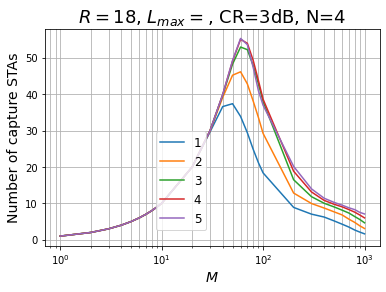

In [38]:
# print(ps_list[4])
# general
plt.semilogx(m_list_simu, success_sta_1, label='1')
plt.semilogx(m_list_simu, success_sta_2, label='2')
plt.semilogx(m_list_simu, success_sta_3, label='3')
plt.semilogx(m_list_simu, success_sta_4, label='4')
plt.semilogx(m_list_simu, success_sta_5, label='5')


plt.title(f'$R={R}$' +', $L_{max} = $' + ', CR=3dB, N=4', fontsize = 18)
plt.xlabel("$M$", fontsize = 14)
plt.ylabel("Number of capture STAs", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(0.5, 0.3), fontsize = 12)
# plt.axis([10,300]) #x spacing,x max, y spcaing, y max
# plt.axis([10,1000,0.1,1.1]) #x spacing,x max, y spcaing, y max
plt.show()